# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](https://webcache.googleusercontent.com/search?q=cache:stAVPik6onEJ:yann.lecun.com/exdb/mnist) and include:

88% [Lecun et al., 1998](https://hal.science/hal-03926082/document)

95.3% [Lecun et al., 1998](https://hal.science/hal-03926082v1/document)

99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)


MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Installation

In [1]:
# Update the PATH to include the user installation directory.
import os
os.environ['PATH'] = f"{os.environ['PATH']}:/root/.local/bin"

# Restart the Kernel before you move on to the next step.

#### Important: Restart the Kernel before you move on to the next step.

In [3]:
# Install requirements
!python -m pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.2/89.2 MB 7.3 MB/s eta 0:00:00
  Installing build dependencies ... canceledERROR: Operation cancelled by user


## Imports

In [7]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`!

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [8]:
# Define transforms
transforms=transforms.ToTensor()


# Create training set and define training dataloader
train_data = torchvision.datasets.MNIST(root="data", train=True, download=True, transform=transforms)
train_loader = DataLoader(train_data, batch_size=100, shuffle=True)

# Create test set and define test dataloader
test_data = torchvision.datasets.MNIST(root="data", train=False, download=True, transform=transforms)
test_loader = DataLoader(test_data, batch_size=100, shuffle=True)

## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

**'transforms.ToTensor()' is chosen for its necessity in converting the image data to the required format for PyTorch and for its simplicity and sufficiency for handling the MNIST dataset effectively. More complex transformations are not used at this stage to keep the initial setup straightforward and to establish a baseline performance**

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [9]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)

    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))

        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

In [11]:
# Explore the dimensions of the data
dataiter = iter(train_loader)
images, labels = next(dataiter)
print(f'Images dimensions: {images.shape}')
print(f'Labels dimensions: {labels.shape}')


Images dimensions: torch.Size([100, 1, 28, 28])
Labels dimensions: torch.Size([100])


0


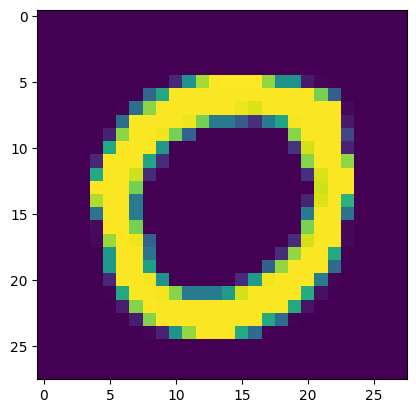

4


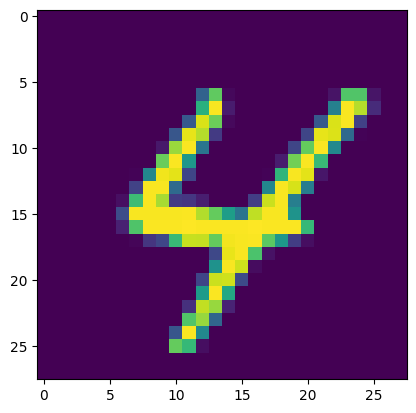

7


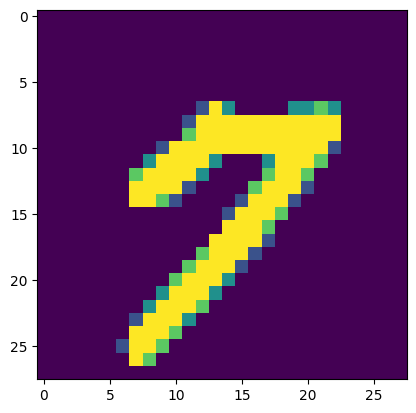

3


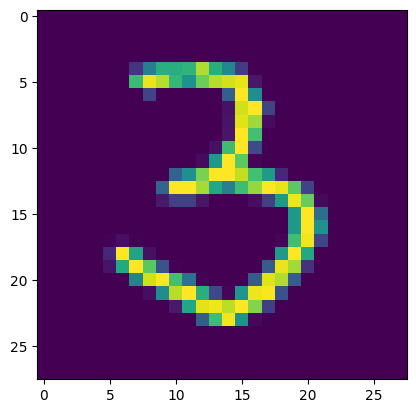

2


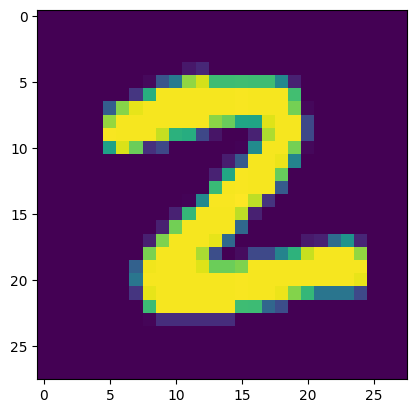

In [12]:
show5(train_loader)

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like.

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [21]:
## Define nueral network ##
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        # Input layer to hidden layer
        self.fc1 = nn.Linear(28 * 28, 128)
        # add dropout
        self.dropout = nn.Dropout(0.5)
        # Hidden layer to output layer
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        # Flatten the input tensor
        x = x.view(-1, 28 * 28)
        # Apply the first fully connected layer and ReLU activation
        x = F.relu(self.fc1(x))
        x = self.dropout(x)  # Apply dropout during training
        # Apply the second fully connected layer (output layer)
        x = self.fc2(x)
        return x

net=SimpleNN()

In [23]:
#optimizer and loss function
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)
criterion = nn.CrossEntropyLoss()
print(net)

SimpleNN(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch.
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [24]:
## Running your neural network
num_epochs=10

# Lists to store training and validation loss history
train_loss_history = []
val_loss_history = []

# Training loop
for epoch in range(num_epochs):
    net.train()  # Set the model to training mode
    train_loss = 0.0
    train_correct = 0

    for inputs, labels in train_loader:
        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = net(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Compute the training loss and accuracy
        _, preds = torch.max(outputs, 1)
        train_correct += (preds == labels).sum().item()
        train_loss += loss.item()

    # Calculate average training loss and accuracy
    avg_train_loss = train_loss / len(train_loader)
    train_accuracy = 100.0 * train_correct / len(train_data)  # Convert to percentage

    print(f'Epoch {epoch + 1}/{num_epochs}, Training Accuracy: {train_accuracy:.2f}%, Training Loss: {avg_train_loss:.5f}')
    train_loss_history.append(avg_train_loss)

    # Validation step
    net.eval()  # Set the model to evaluation mode
    val_loss = 0.0
    val_correct = 0

    with torch.no_grad():  # No need to compute gradients during validation
        for inputs, labels in test_loader:
            outputs = net(inputs)
            loss = criterion(outputs, labels)

            _, preds = torch.max(outputs, 1)
            val_correct += (preds == labels).sum().item()
            val_loss += loss.item()

    # Calculate average validation loss and accuracy
    avg_val_loss = val_loss / len(test_loader)
    val_accuracy = 100.0 * val_correct / len(test_data)  # Convert to percentage

    print(f'Epoch {epoch + 1}/{num_epochs}, Validation Accuracy: {val_accuracy:.2f}%, Validation Loss: {avg_val_loss:.5f}')
    val_loss_history.append(avg_val_loss)

Epoch 1/10, Training Accuracy: 80.79%, Training Loss: 0.67262
Epoch 1/10, Validation Accuracy: 91.82%, Validation Loss: 0.29194
Epoch 2/10, Training Accuracy: 90.26%, Training Loss: 0.34022
Epoch 2/10, Validation Accuracy: 93.66%, Validation Loss: 0.22138
Epoch 3/10, Training Accuracy: 92.16%, Training Loss: 0.28031
Epoch 3/10, Validation Accuracy: 94.79%, Validation Loss: 0.18156
Epoch 4/10, Training Accuracy: 93.03%, Training Loss: 0.24206
Epoch 4/10, Validation Accuracy: 95.42%, Validation Loss: 0.15676
Epoch 5/10, Training Accuracy: 93.68%, Training Loss: 0.21936
Epoch 5/10, Validation Accuracy: 95.68%, Validation Loss: 0.14041
Epoch 6/10, Training Accuracy: 94.15%, Training Loss: 0.20255
Epoch 6/10, Validation Accuracy: 96.14%, Validation Loss: 0.12910
Epoch 7/10, Training Accuracy: 94.52%, Training Loss: 0.19175
Epoch 7/10, Validation Accuracy: 96.51%, Validation Loss: 0.12055
Epoch 8/10, Training Accuracy: 94.83%, Training Loss: 0.18199
Epoch 8/10, Validation Accuracy: 96.66%, V

Plot the training loss (and validation loss/accuracy, if recorded).

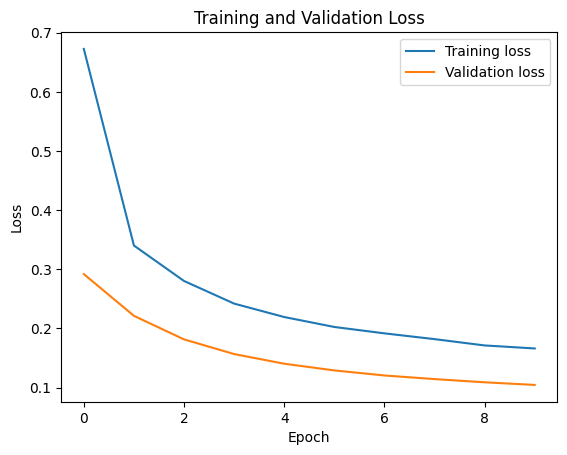

In [25]:
## plot the training loss
plt.plot(train_loss_history, label= 'Training loss')
plt.plot(val_loss_history, label= 'Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

### Training Loss
- **Decreasing Trend**: The training loss shows a consistent decrease across epochs, which is expected and indicates that the model is learning from the training data effectively.

### Validation Loss
- **Decreasing Trend**: The validation loss also shows a consistent decrease across epochs, similar to the training loss. This suggests that the model is not just memorizing the training data but is also generalizing well to the validation data.

### Key Points
- **Convergence**: Both the training and validation losses decrease steadily and do not show signs of divergence or overfitting. This indicates that the model is learning effectively and generalizing well.

- **No Overfitting**: The absence of a significant gap between the training and validation losses suggests that overfitting is not an issue in this case. The model performs well on unseen data, which is a good sign.

### Recommendations
- **Continue Training**: If the losses are still decreasing, it might be beneficial to continue training for a few more epochs to see if further improvements can be made.

- **Model Evaluation**: After training, evaluate the model's performance on a separate test set to confirm its generalization capabilities.

- **Hyperparameter Tuning**: If needed, continue experimenting with different hyperparameters to further optimize the model's performance.


## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction.

If your accuracy is over 90%, great work, but see if you can push a bit further!
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [26]:
## Testing the model

def test(model, test_loader):
  net.eval()
  test_loss = 0.0
  test_correct = 0

  with torch.no_grad():
    for inputs, labels in test_loader:
      outputs = net(inputs)
      loss = criterion(outputs, labels)
      _, preds = torch.max(outputs, 1)
      test_correct += (preds == labels).sum().item()
      test_loss += loss.item()

  avg_test_loss = test_loss / len(test_loader)
  test_accuracy = 100.0 * test_correct / len(test_data)
  return avg_test_loss, test_accuracy

test_loss, test_accuracy = test(net, test_loader)
print(f'Test Accuracy: {test_accuracy:.2f}%')

Test Accuracy: 96.83%


## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

In [40]:
## define another NN

class SimpleNN2(nn.Module):
  def __init__(self):
    super(SimpleNN2, self).__init__()
    # Input layer to hidden layer
    self.fc1 = nn.Linear(28 * 28, 256)
    # add dropout
    self.dropout = nn.Dropout(0.5)
    # Hidden layer to output layer
    self.fc2 = nn.Linear(256, 10)
  def forward(self, x):
    # Flatten the input tensor
    x = x.view(-1, 28 * 28)
    # Apply the first fully connected layer and ReLU activation
    x = F.relu(self.fc1(x))
    x = self.dropout(x)  # Apply dropout during training
    # Apply the second fully connected layer (output layer)
    x = self.fc2(x)
    return x

net2 = SimpleNN2()

In [41]:
# Defining loss function and optimizer
optimizer = optim.Adam(net2.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()
print(net2)

SimpleNN2(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=256, out_features=10, bias=True)
)


In [42]:
# Train the model
num_epochs = 10

# Lists to store training and validation loss history
train_loss_history = []
val_loss_history = []

for epoch in range(num_epochs):
    net2.train()  # Set the model to training mode
    train_loss = 0.0
    train_correct = 0

    for inputs, labels in train_loader:
        # Zero the gradients
        optimizer.zero_grad()
        # Forward pass
        outputs = net2(inputs)
        loss = criterion(outputs, labels)
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        # Compute the training loss and accuracy
        _, preds = torch.max(outputs, 1)
        train_correct += (preds == labels).sum().item()
        train_loss += loss.item()
        print(f'Epoch {epoch + 1}/{num_epochs}, Training Accuracy: {train_accuracy:.2f}%, Training Loss: {avg_train_loss:.5f}')
        train_loss_history.append(avg_train_loss)
        # Validation step
    net2.eval()  # Set the model to evaluation mode
    val_loss = 0.0
    val_correct = 0
    with torch.no_grad():  # No need to compute gradients during validation
        for inputs, labels in test_loader:
            outputs = net2(inputs)
            loss = criterion(outputs, labels)
            _, preds = torch.max(outputs, 1)
            val_correct += (preds == labels).sum().item()
            val_loss += loss.item()
            # Calculate average validation loss and accuracy
    avg_val_loss = val_loss / len(test_loader)
    val_accuracy = 100.0 * val_correct / len(test_data)  # Convert to percentage
    print(f'Epoch {epoch + 1}/{num_epochs}, Validation Accuracy: {val_accuracy:.2f}%, Validation Loss: {avg_val_loss:.5f}')
    val_loss_history.append(avg_val_loss)


Streaming output truncated to the last 5000 lines.
Epoch 2/10, Training Accuracy: 95.15%, Training Loss: 0.16623
Epoch 2/10, Training Accuracy: 95.15%, Training Loss: 0.16623
Epoch 2/10, Training Accuracy: 95.15%, Training Loss: 0.16623
Epoch 2/10, Training Accuracy: 95.15%, Training Loss: 0.16623
Epoch 2/10, Training Accuracy: 95.15%, Training Loss: 0.16623
Epoch 2/10, Training Accuracy: 95.15%, Training Loss: 0.16623
Epoch 2/10, Training Accuracy: 95.15%, Training Loss: 0.16623
Epoch 2/10, Training Accuracy: 95.15%, Training Loss: 0.16623
Epoch 2/10, Training Accuracy: 95.15%, Training Loss: 0.16623
Epoch 2/10, Training Accuracy: 95.15%, Training Loss: 0.16623
Epoch 2/10, Training Accuracy: 95.15%, Training Loss: 0.16623
Epoch 2/10, Training Accuracy: 95.15%, Training Loss: 0.16623
Epoch 2/10, Training Accuracy: 95.15%, Training Loss: 0.16623
Epoch 2/10, Training Accuracy: 95.15%, Training Loss: 0.16623
Epoch 2/10, Training Accuracy: 95.15%, Training Loss: 0.16623
Epoch 2/10, Trainin

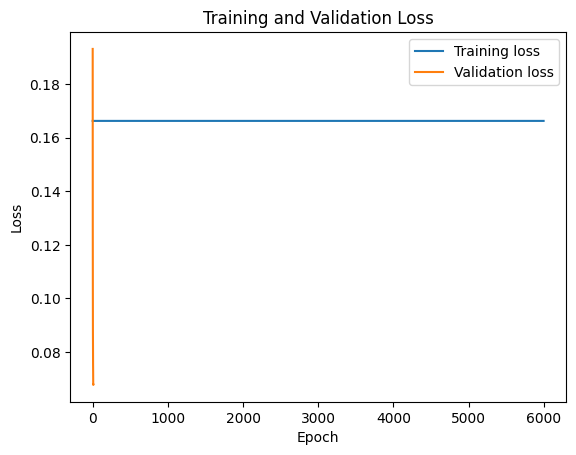

In [43]:
# plot the training and validation loss
plt.plot(train_loss_history, label= 'Training loss')
plt.plot(val_loss_history, label= 'Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [44]:
# Test the model
def test2():
    net2.eval()
    test_loss = 0
    test_correct = 0
    for i, data in enumerate(test_loader):
        inputs, labels  = data

        optimizer.zero_grad()

        outputs = net2(inputs)
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs.data, 1)
        test_correct += (preds == labels).sum().item()
        test_loss += loss.item()
    print(f'Epoch {epoch + 1} test accuracy: {test_correct/len(test_loader):.2f}% test loss: {test_loss/len(test_loader):.5f}')

In [45]:
for epoch in range(num_epochs):
    test2()

Epoch 1 test accuracy: 98.02% test loss: 0.06264
Epoch 2 test accuracy: 99.03% test loss: 0.03334
Epoch 3 test accuracy: 99.57% test loss: 0.02143
Epoch 4 test accuracy: 99.79% test loss: 0.01505
Epoch 5 test accuracy: 99.92% test loss: 0.01091
Epoch 6 test accuracy: 99.96% test loss: 0.00821
Epoch 7 test accuracy: 99.98% test loss: 0.00650
Epoch 8 test accuracy: 100.00% test loss: 0.00553
Epoch 9 test accuracy: 100.00% test loss: 0.00463
Epoch 10 test accuracy: 100.00% test loss: 0.00404


## Saving your model
Using `torch.save`, save your model for future loading.

In [46]:
## Save your model
torch.save(net, "Net.pth")
torch.save(net2, "Net2.pth")